# Data Understanding and EDA

In [1]:
# Importing necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the training dataset into a dataframe
data = pd.read_csv('dementia_pati ents_health_data.csv')

# Displaying first few records for understanding structure
data.head()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1


### Summary Statistics

In [2]:
# Summary staistics of the data for numeric variables
data.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [3]:
# Summary staistics of the data for categorical variables
data.describe(include='O')

,Prescription,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions
count,485,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,4,2,2,2,3,2,3,2,2,3,2,4
top,Memantine,Primary School,Left,Female,Yes,Former Smoker,Positive,Mild Activity,No,Yes,Mediterranean Diet,Poor,Diabetes
freq,128,389,519,504,520,458,694,351,755,514,338,534,513


### Missing Values

In [4]:
# Calculating the sum of missing values in each variable 
data.isna().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions      0
Dementia                       0
dtype: int64

**The data has 515 missing values for both Prescription and Dosage in mg **

### Duplicates

In [5]:
# Analysing the full records of duplicates to see if they're complete duplicates across all columns
all_columns_duplicates = data[data.duplicated(keep=False)]

# Counting the number of duplicate rows
num_duplicates = all_columns_duplicates.shape[0]

num_duplicates

0

### Outlier Detection

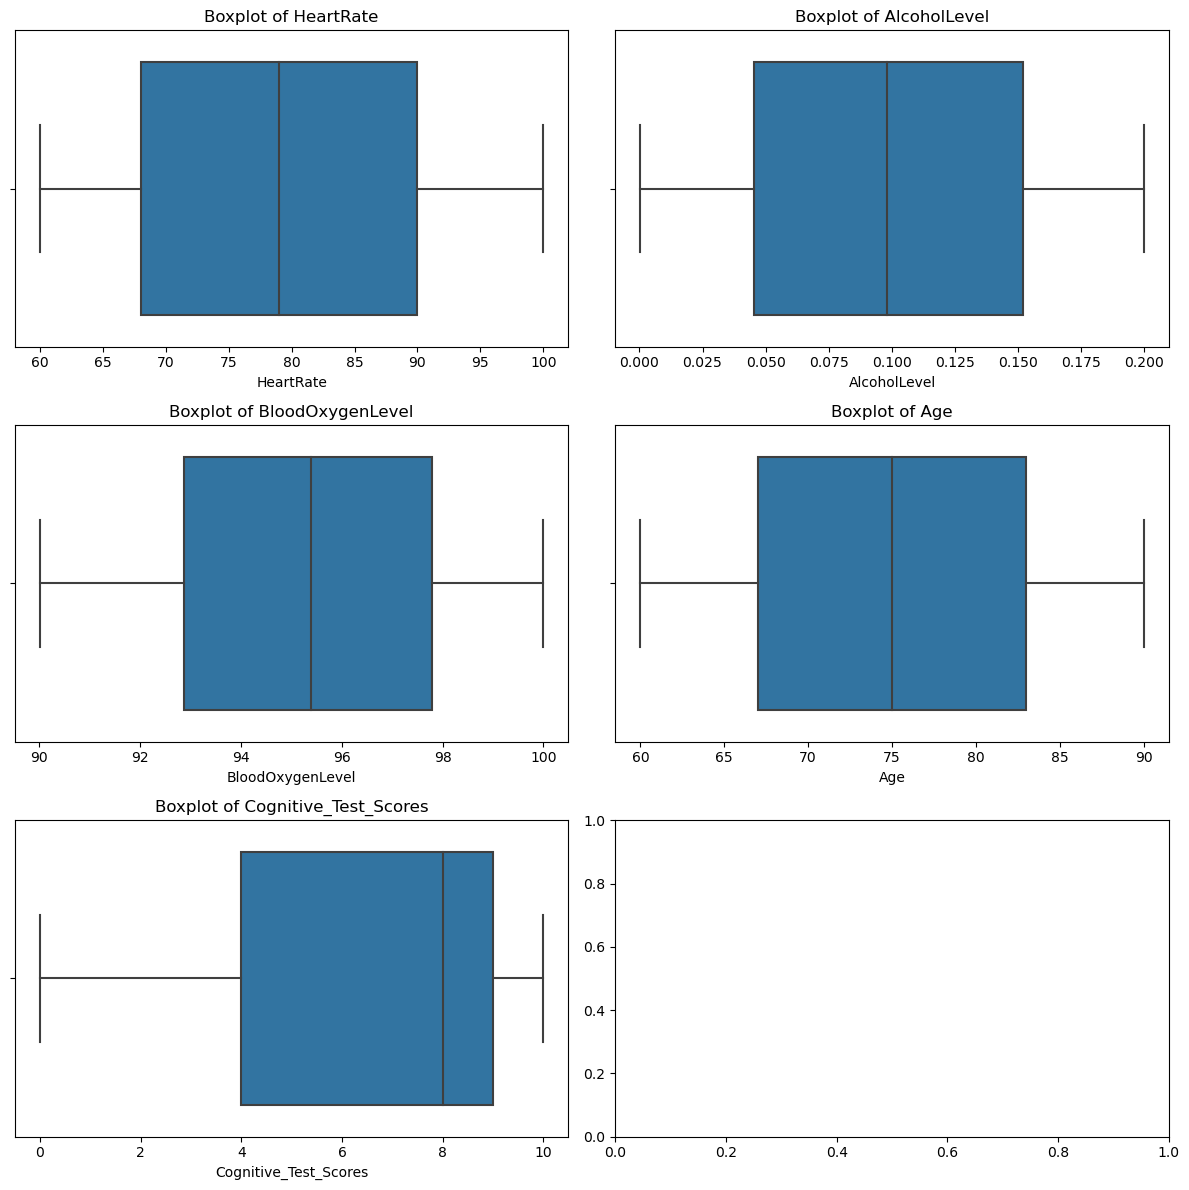

In [6]:
# Plotting boxplots for each variable to visually inspect outliers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten() 

variables_of_interest = ['HeartRate', 'AlcoholLevel', 'BloodOxygenLevel', 'Age', 'Cognitive_Test_Scores']
for i, variable in enumerate(variables_of_interest):
    sns.boxplot(x=data[variable], ax=axes[i])
    axes[i].set_title(f'Boxplot of {variable}')

# Adjusting layout to prevent overlap
plt.tight_layout()  
plt.show()
 

In [7]:
# Again taking sample of data 
#sample_data = data.sample(n=2000, random_state=42)

# Defining a function to calculate the IQR and identify outliers
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [8]:

credit_score_outliers = detect_outliers(data, 'Dosage in mg')
age_outliers = detect_outliers(data, 'Cognitive_Test_Scores')
balance_outliers = detect_outliers(data, 'Dosage in mg')

# Number of outliers in each feature
num_credit_score_outliers = credit_score_outliers.shape[0]
num_age_outliers = age_outliers.shape[0]
num_balance_outliers = balance_outliers.shape[0]

num_credit_score_outliers, num_age_outliers, num_balance_outliers

(0, 0, 0)

Text(0.5, 1.0, 'Cognitive Test Scores')

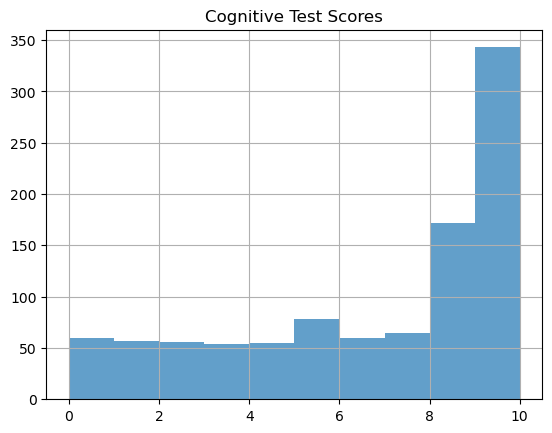

In [9]:

data_column = data['Cognitive_Test_Scores']
data_column.hist(bins=10, alpha=0.7)
plt.title('Cognitive Test Scores')

# Data Visualization

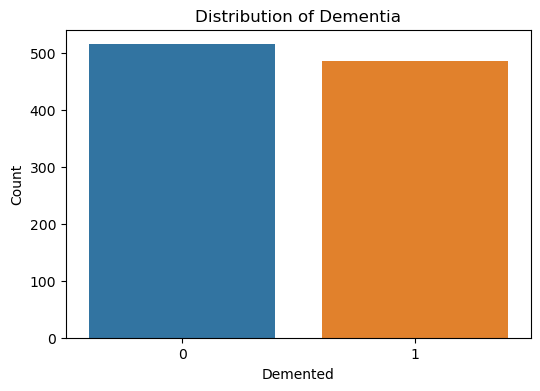

In [10]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Dementia', data=data)
plt.title('Distribution of Dementia')
plt.xlabel('Demented')
plt.ylabel('Count')
plt.show()

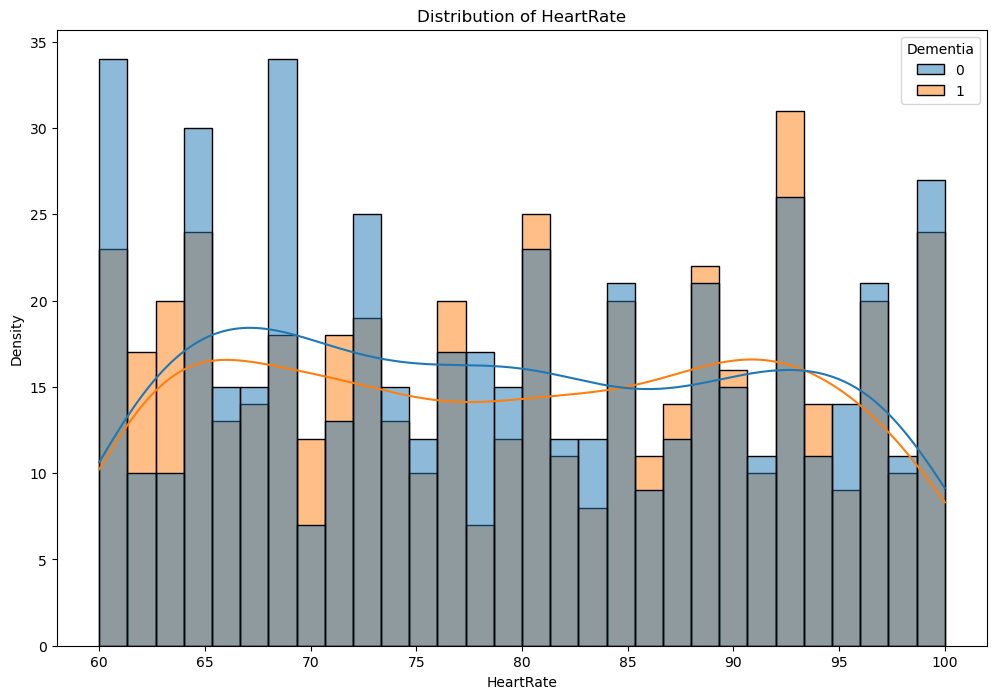

In [11]:
# HeartRate distribution with respect to Dementia
plt.figure(figsize=(12, 8))
sns.histplot(x='HeartRate', hue='Dementia', data=data, kde=True, bins=30)
plt.title('Distribution of HeartRate')
plt.xlabel('HeartRate')
plt.ylabel('Density')
plt.show()

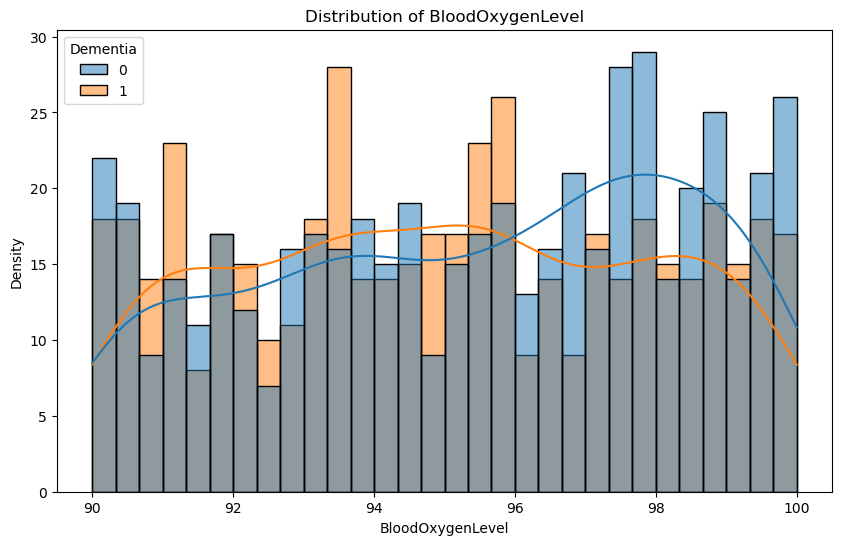

In [12]:
# BloodOxygenLevel distribution with respect to Dementia
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='BloodOxygenLevel', hue='Dementia', kde=True, bins=30)
plt.title('Distribution of BloodOxygenLevel')
plt.xlabel('BloodOxygenLevel')
plt.ylabel('Density')
plt.show()

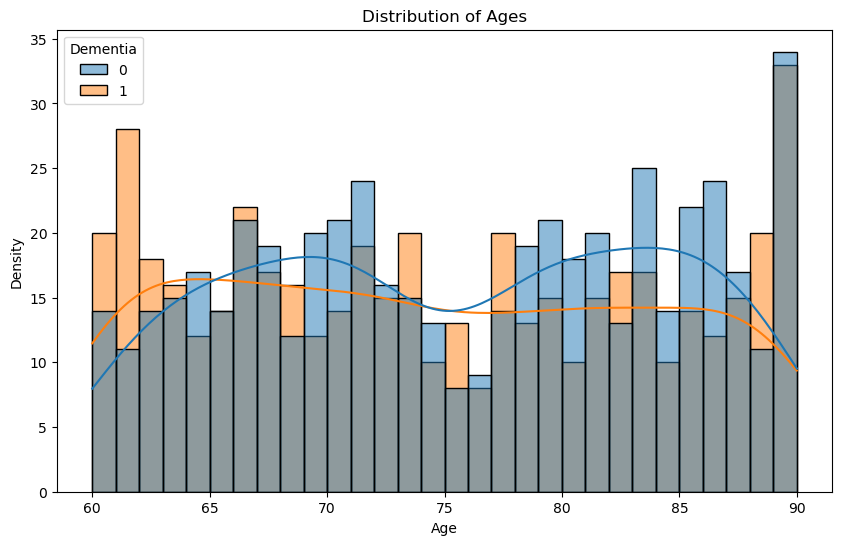

In [13]:
# Age distribution with respect to Dementia
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Dementia', kde=True, bins=30)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

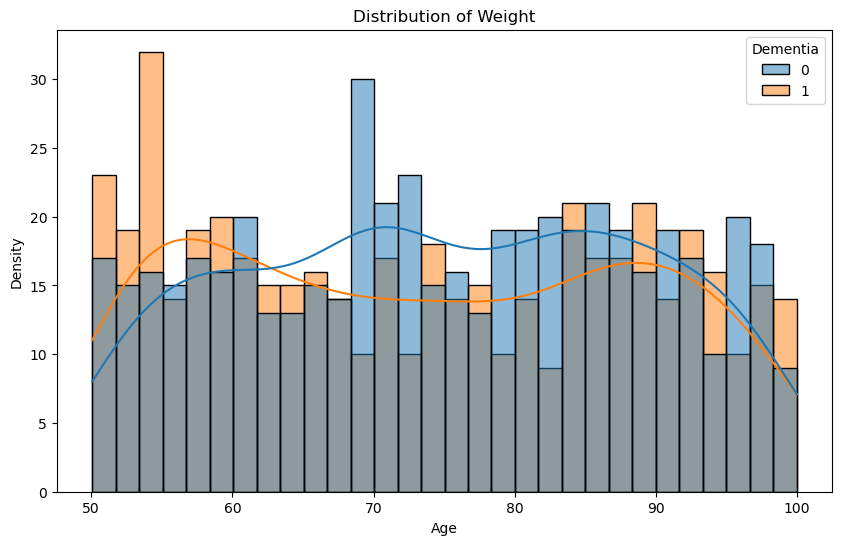

In [14]:
# Weight distribution with respect to Dementia
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Weight', hue='Dementia', kde=True, bins=30)
plt.title('Distribution of Weight')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

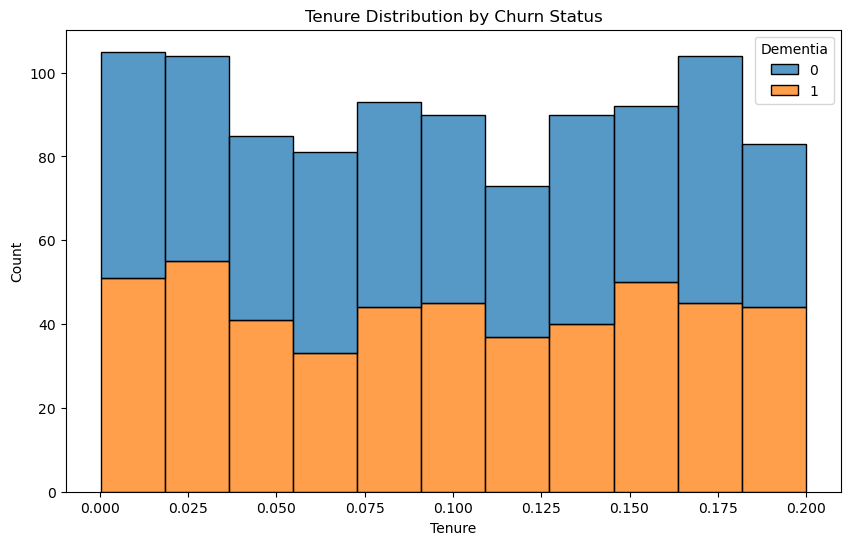

In [15]:
# Tenure distribution with respect to Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AlcoholLevel', hue='Dementia', kde=False, multiple="stack")
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

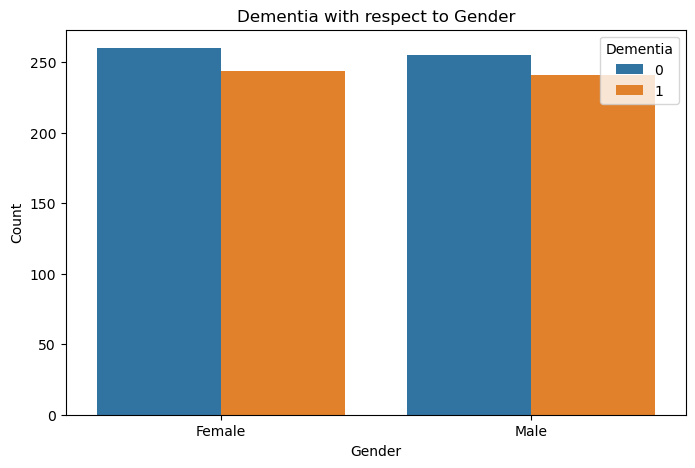

In [16]:
# Patients affected by dementia with respect to Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Dementia', data=data)
plt.title('Dementia with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

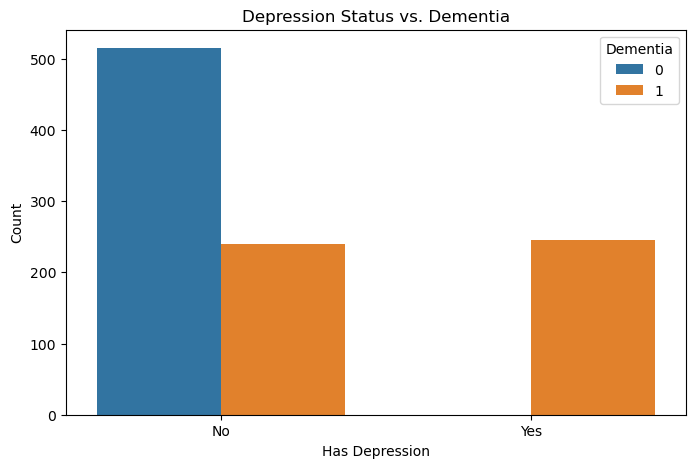

In [17]:
# Depression Status with respect to Dementia
plt.figure(figsize=(8, 5))
sns.countplot(x='Depression_Status', hue='Dementia', data=data)
plt.title('Depression Status vs. Dementia')
plt.xlabel('Has Depression')
plt.ylabel('Count')
plt.show()

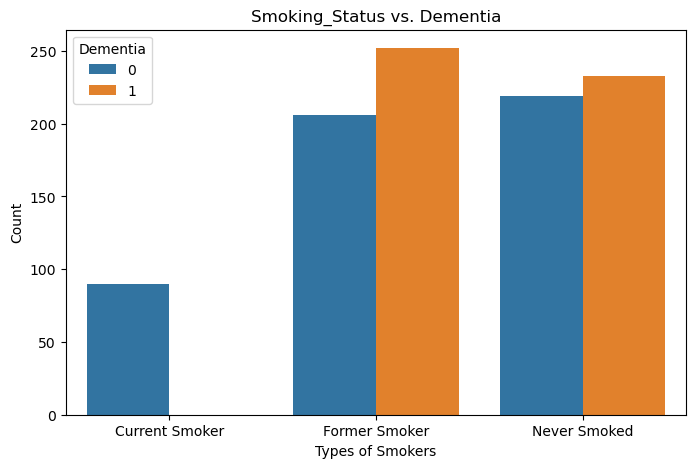

In [18]:
# Smoking Status with respect to Dementia
plt.figure(figsize=(8, 5))
sns.countplot(x='Smoking_Status', hue='Dementia', data=data)
plt.title('Smoking_Status vs. Dementia')
plt.xlabel('Types of Smokers')
plt.ylabel('Count')
plt.show()

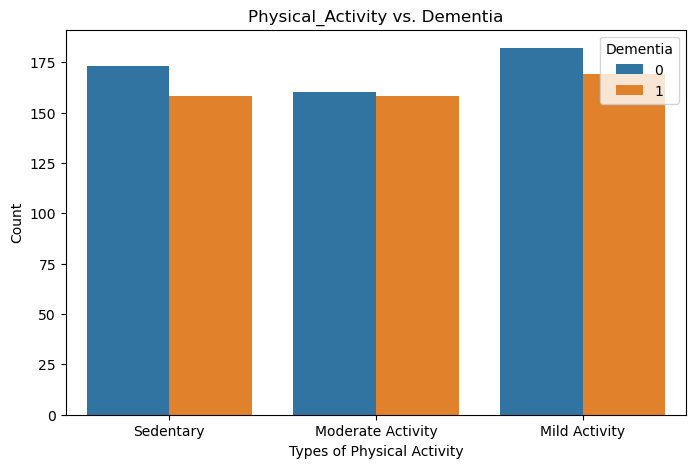

In [19]:
# Physical Activity with respect to Dementia
plt.figure(figsize=(8, 5))
sns.countplot(x='Physical_Activity', hue='Dementia', data=data)
plt.title('Physical_Activity vs. Dementia')
plt.xlabel('Types of Physical Activity')
plt.ylabel('Count')
plt.show()

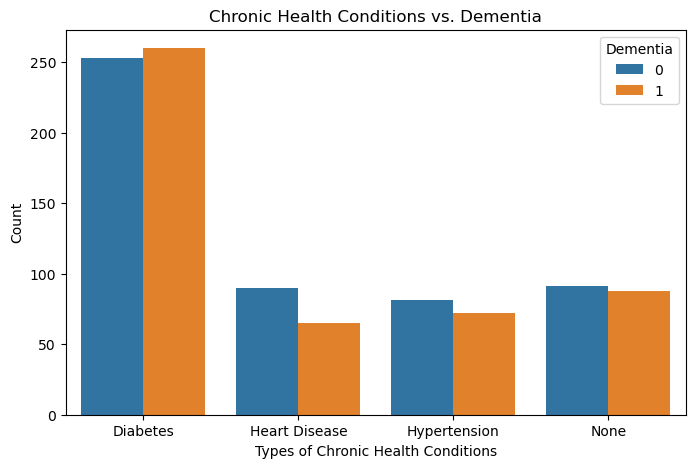

In [20]:
# Chronic Health Conditions with respect to Dementia
plt.figure(figsize=(8, 5))
sns.countplot(x='Chronic_Health_Conditions', hue='Dementia', data=data)
plt.title('Chronic Health Conditions vs. Dementia')
plt.xlabel('Types of Chronic Health Conditions')
plt.ylabel('Count')
plt.show()

### Correlation Analysis

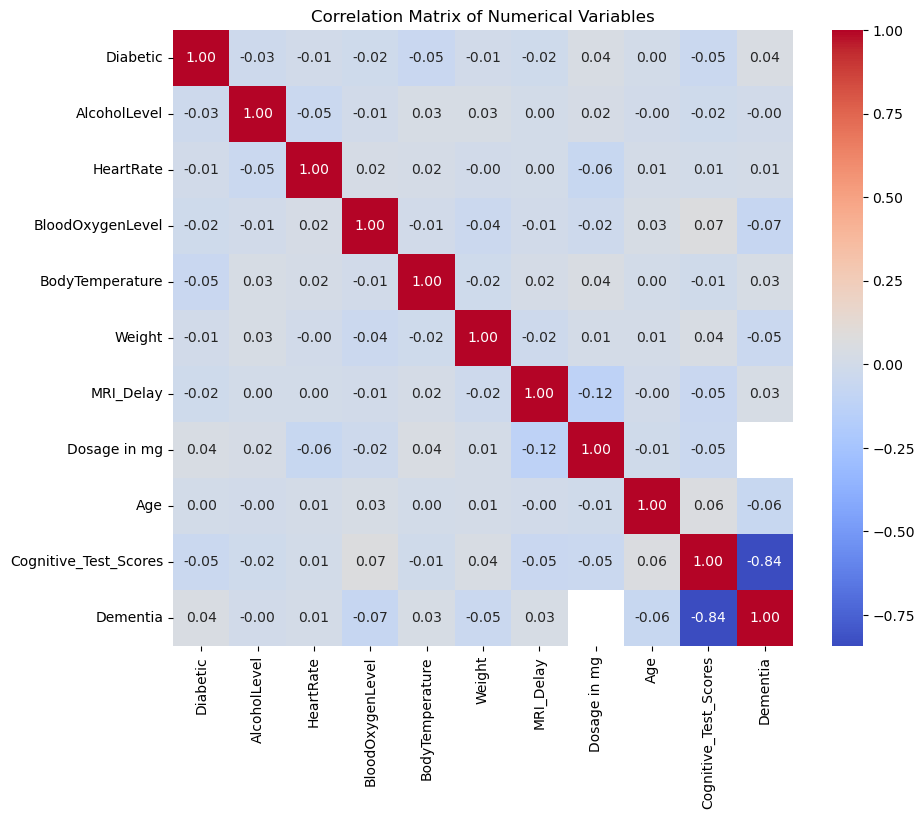

In [21]:
# Create correlation matrix for numerical variables
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Data Preprocessing

### Feature Scaling

In [22]:
# Importing necessary liberaries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [23]:
# Dropping columns that are not relevant for prediction
data_model = data.drop(['Gender', 'Dominant_Hand'], axis=1)

# Separating features and target variable
X = data_model.drop('Dementia', axis=1)
y = data_model['Dementia']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [24]:
# Preprocessing steps for numerical columns: imputation + scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing steps for categorical columns: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
# Combining preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_prepared.shape, X_test_prepared.shape

((800, 41), (200, 41))

# Training Pipeline

In [26]:
# Importing necessary liberaries and packages
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
# Defining the classifiers to be used in the pipeline
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier()
}

In [33]:
# Hyperparameters to tune for each classifier
param_grid = {
    'LogisticRegression': {'classifier__C': [0.1, 1.0, 10.0]},
    'RandomForestClassifier': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [None, 10, 5], 'classifier__min_samples_leaf': [1, 2, 4]},
    'GradientBoostingClassifier': {'classifier__n_estimators': [100, 150], 'classifier__learning_rate': [0.01, 0.1, 0.2]},
    'MLPClassifier': {'classifier__hidden_layer_sizes': [(50,), (100,)], 
                      'classifier__activation': ['tanh', 'relu']},
    'XGBClassifier': {'classifier__n_estimators': [100, 200], 
                      'classifier__learning_rate': [0.01, 0.1, 0.2],
                      'classifier__max_depth': [3, 6, 9]},
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    },
    'AdaBoostClassifier': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1.0]
    },
    'KNeighborsClassifier': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    }
}


In [34]:
# Results storage
best_estimators = {}
best_scores = {}

for name, clf in classifiers.items():
    # Creating a pipeline with the preprocessor and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Grid search for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid=param_grid[name], cv=10, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Storing the best estimator and its score
    best_estimators[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    
    print(f"{name}: Best Score = {grid_search.best_score_:.4f}")

best_estimators, best_scores

LogisticRegression: Best Score = 0.9938
RandomForestClassifier: Best Score = 1.0000
GradientBoostingClassifier: Best Score = 1.0000


/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mayank/anaconda3/lib/pyth

MLPClassifier: Best Score = 0.9888
XGBClassifier: Best Score = 1.0000
SVC: Best Score = 0.9975
AdaBoostClassifier: Best Score = 1.0000
KNeighborsClassifier: Best Score = 0.9313


({'LogisticRegression': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer()),
                                                                    ('scaler',
                                                                     StandardScaler())]),
                                                    Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
         'BodyTemperature', 'Weight', 'MRI_Delay', 'Dosage in mg', 'Age',
         'Cognitive_Test_Scores'],
        dtype='object')),
                                                   ('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleI...
                                                                    ('oneh

In [35]:
from sklearn.metrics import accuracy_score, f1_score, recall_score


# Initialize storage for scores
train_scores = {}

for name, clf in classifiers.items():
    # Creating a pipeline with the preprocessor and the classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the training data
    predictions = pipeline.predict(X_train)
   
    # Calculate metrics
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions)
    recall = recall_score(y_train, predictions)
    
    # Store the scores
    train_scores[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall
    
    }

    # Print the scores for the current classifier
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  Recall: {recall:.4f}")
    


LogisticRegression:
  Accuracy: 0.9950
  F1 Score: 0.9947
  Recall: 0.9894
RandomForestClassifier:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Recall: 1.0000
GradientBoostingClassifier:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Recall: 1.0000
MLPClassifier:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Recall: 1.0000
XGBClassifier:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Recall: 1.0000
SVC:
  Accuracy: 0.9950
  F1 Score: 0.9947
  Recall: 0.9894
AdaBoostClassifier:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Recall: 1.0000
KNeighborsClassifier:
  Accuracy: 0.9425
  F1 Score: 0.9354
  Recall: 0.8786


# Model Evaluation 

Accuracy on Test Data: 1.0000
F1 Score on Test Data: 1.0000
Recall on Test Data: 1.0000


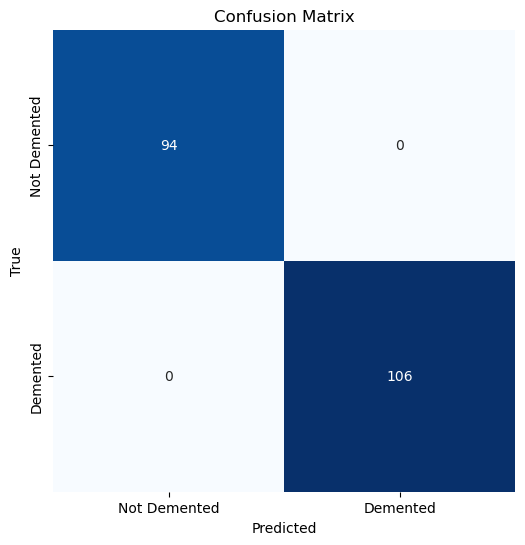

In [73]:
# Importing liberaries 
from sklearn.metrics import roc_auc_score, confusion_matrix

best_model = best_estimators['XGBClassifier']

# Predictions on the test data
predictions = best_model.predict(X_test)

# Probability estimates for ROC-AUC
prob_predictions = best_model.predict_proba(X_test)[:, 1] 

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, predictions)
f1_test = f1_score(y_test, predictions)
recall_test = recall_score(y_test, predictions)
roc_auc_test = roc_auc_score(y_test, prob_predictions)

# Printing the evaluation metrics
print(f"Accuracy on Test Data: {accuracy:.4f}")
print(f"F1 Score on Test Data: {f1:.4f}")
print(f"Recall on Test Data: {recall:.4f}")
#print(f"ROC AUC Score on Test Data: {roc_auc:.4f}")

# Plotting the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False,
            xticklabels=["Not Demented", "Demented"],
            yticklabels=["Not Demented", "Demented"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


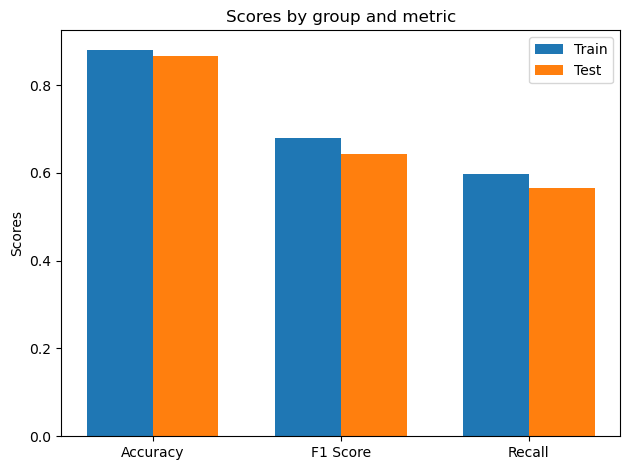

In [97]:
# Metrics
metrics = ['Accuracy', 'F1 Score', 'Recall']
train_results = [0.8805, 0.6787, 0.5962]
test_results = [0.8672, 0.6425, 0.5665]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Create bar chart
fig, ax = plt.subplots()
rect1 = ax.bar(x - width/2, train_results, width, label='Train')
rect2 = ax.bar(x + width/2, test_results, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()

plt.show()
